# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
import sympy as sp
sp.init_printing()
import math as mt
import pandas as pd
import urllib.request

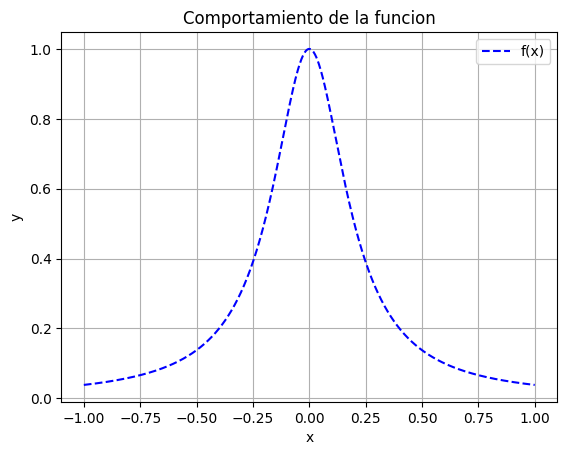

In [2]:
# Punto 1
# Definimos nuestra funcion y miramos su comportamiento en el intervalo
f = lambda x: 1/(1+25*x**2)
x = np.linspace(-1, 1, 1000)

plt.title('Comportamiento de la funcion')
plt.plot(x, f(x), 'b--', label = 'f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

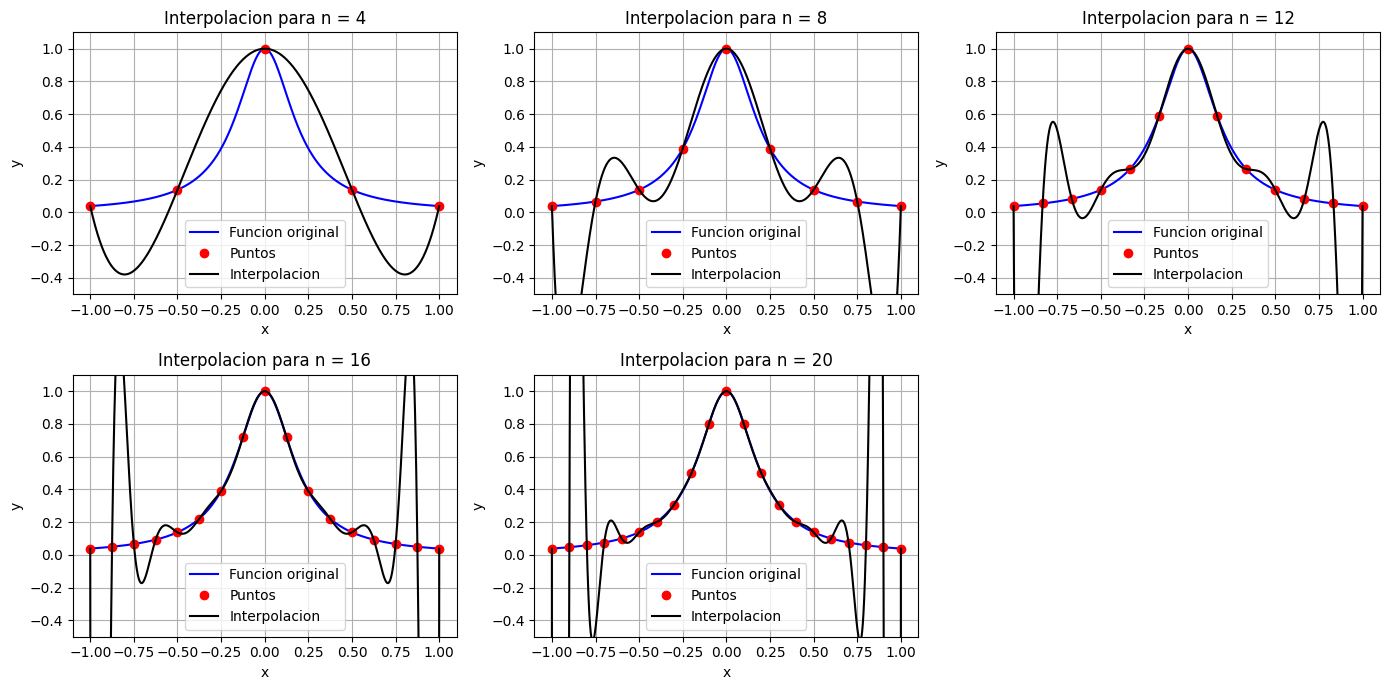

In [3]:
# Punto 1
# Definimos los n para los que queremos interpolar
N = [4, 8, 12, 16, 20]
plt.figure(figsize=(14, 7))  # Tamaño de la figura

for i in range(len(N)):
  n = N[i]+1

  x_ = np.linspace(-1, 1, n) # Puntos a interpolar
  pl = lagrange(x_, f(x_)) # Funcion de interpolacion
  xi = np.linspace(np.min(x_), np.max(x_), 1000)

  # Graficamos la interpolacion y la funcion
  plt.subplot(2, 3, i+1)  # Subgrafico i
  plt.title(f'Interpolacion para n = {N[i]}')
  plt.plot(x, f(x), 'b-', label = 'Funcion original')
  plt.plot(x_, f(x_), 'ro', label = 'Puntos')
  plt.plot(xi, pl(xi), 'k-', label = 'Interpolacion')
  plt.ylim(-0.5, 1.1)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.grid()

plt.tight_layout()

In [4]:
# Punto 2
# Definimos nuestra funcion simbolicamente
f_s = lambda y: 1/(1+25*y**2)
y = sp.symbols('y')

f_s(y)

    1    
─────────
    2    
25⋅y  + 1

-0.04504504504504503


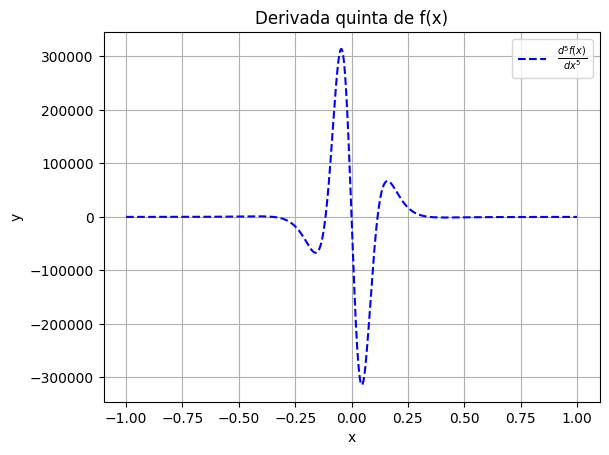

In [5]:
# Calculamos la derivada de la funcion para n=4+1

df5 = sp.diff(f_s(y), y, 5)
f5 = sp.lambdify(y, df5, 'numpy') # Comvertimos la funcion simbolica en una funcion de numpy

x5=np.linspace(-1, 1, 1000)

x_max = np.max(abs(f5(x5))) # Maximo de la derivada
x_zeta = np.argmax(abs(f5(x5))) # Posicion del maximo

print(x5[x_zeta])

# Graficamos el comportamiento de la quinta derivada
plt.title('Derivada quinta de f(x)')
plt.plot(x5, f5(x5), 'b--', label = r'$\frac{d^{5}f(x)}{dx^{5}}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

-0.0


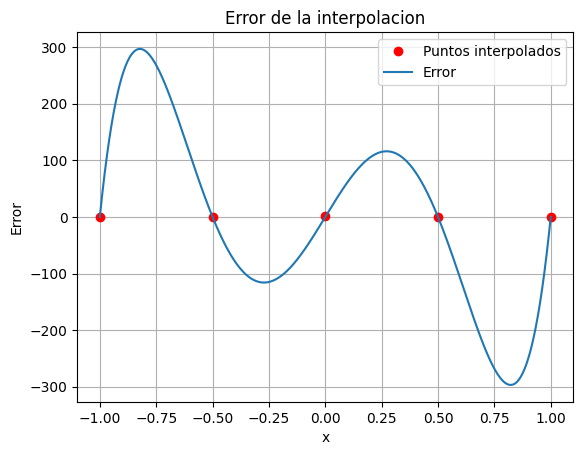

In [6]:
# Definimos el valor de n
N = 4
n = N+1
x_ = np.linspace(-1, 1, n) # Puntos a interpolar
xl = np.linspace(np.min(x_), np.max(x_), 1000)

# Definimos una funcion para el calculo de la cota del error
e = lambda x: x_max/mt.factorial(n)*(x-x_[0])*(x-x_[1])*(x-x_[2])*(x-x_[3])*(x-x_[4])

print(e(0.5))

plt.title('Error de la interpolacion')
plt.plot(x_, f(x_), 'ro', label = 'Puntos interpolados')
plt.plot(xl, e(xl), label = 'Error')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid()

##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

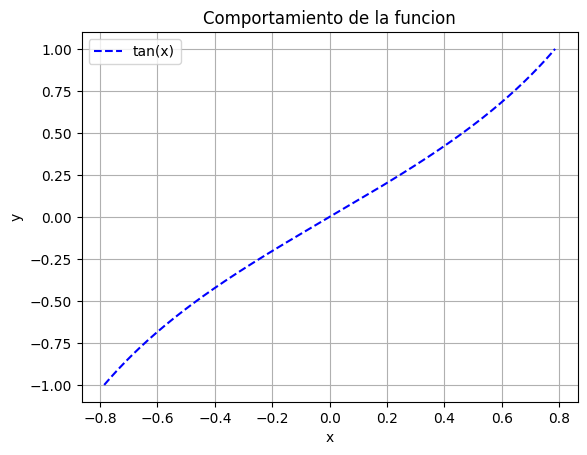

In [7]:
# Definimos nuestra funcion de tangente y el intervalo a estudiar
ft = lambda x: np.tan(x)
xt = np.linspace(-np.pi/4, np.pi/4, 1000)

# Miramos su comportamiento en este intervalo
plt.title('Comportamiento de la funcion')
plt.plot(xt, ft(xt), 'b--', label = 'tan(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

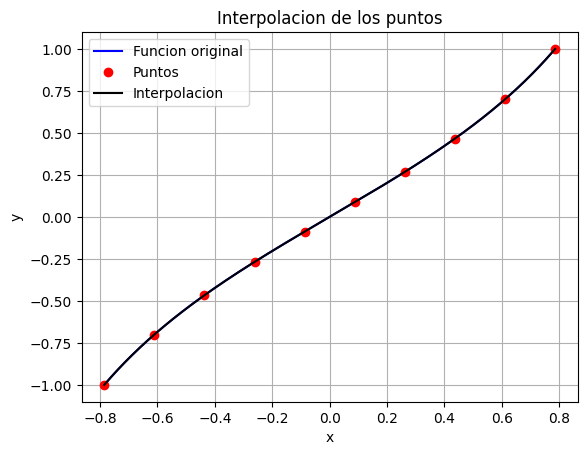

In [20]:
# Definimos el valor de n
N = 9
n = N+1

xt_ = np.linspace(-np.pi/4, np.pi/4, n) # Puntos a interpolar
pl = lagrange(xt_, ft(xt_)) # Funcion de interpolacion
xtl = np.linspace(np.min(xt_), np.max(xt_), 1000)

# Graficamos la funcion original y la interpolacion de lagrange
plt.title('Interpolacion de los puntos')
plt.plot(xt, ft(xt), 'b-', label = 'Funcion original')
plt.plot(xt_, ft(xt_), 'ro', label = 'Puntos')
plt.plot(xtl, pl(xtl), 'k-', label = 'Interpolacion')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

In [9]:
# Definimos la funcion simbolicamente
ft_s = lambda y: sp.tan((y))

y = sp.symbols('y')

ft_s(y)

tan(y)

1.0


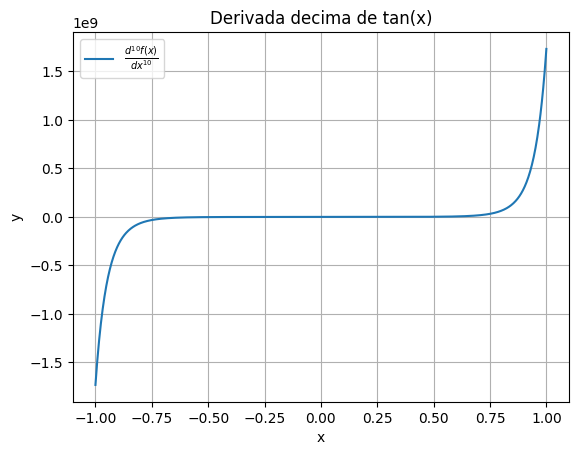

In [10]:
# Calculamos la decima derivada para calcular la cota de error
dft10 = sp.diff(ft_s(y), y, 10)
ft10 = sp.lambdify(y, dft10, 'numpy') # Devolviendola a objeto numpy

x10 = np.linspace(-1, 1, 1000)
xt_max = np.max(abs(ft10(x10))) # Valor maximo de la derivada
xt_zeta = np.argmax(ft10(x10)) # Posicion del maximo

print(x10[xt_zeta]) # Valor en x del maximo

# Graficamos el comportamiento de la derivada
plt.title('Derivada decima de tan(x)')
plt.plot(x10, ft10(x10), label = r'$\frac{d^{10}f(x)}{dx^{10}}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

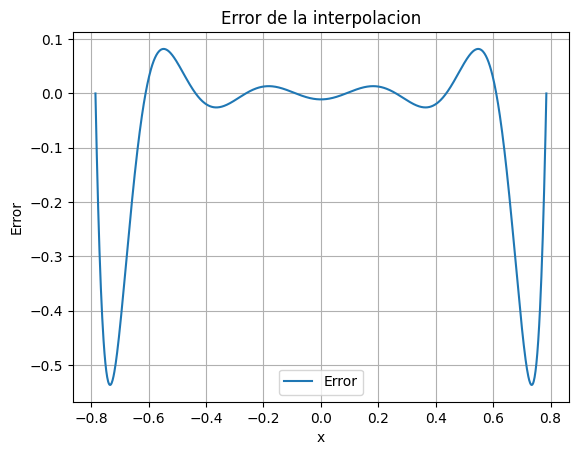

In [11]:
# Definimos la funcion del calculo de la cota del error
e = lambda x: xt_max/mt.factorial(n)*(x-xt_[0])*(x-xt_[1])*(x-xt_[2])*(x-xt_[3])*(x-xt_[4])*(x-xt_[5])*(x-xt_[6])*(x-xt_[7])*(x-xt_[8])*(x-xt_[9])

# Graficamos el error de la interpolacion
plt.title('Error de la interpolacion')
plt.plot(xtl, e(xtl), label = 'Error')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid()

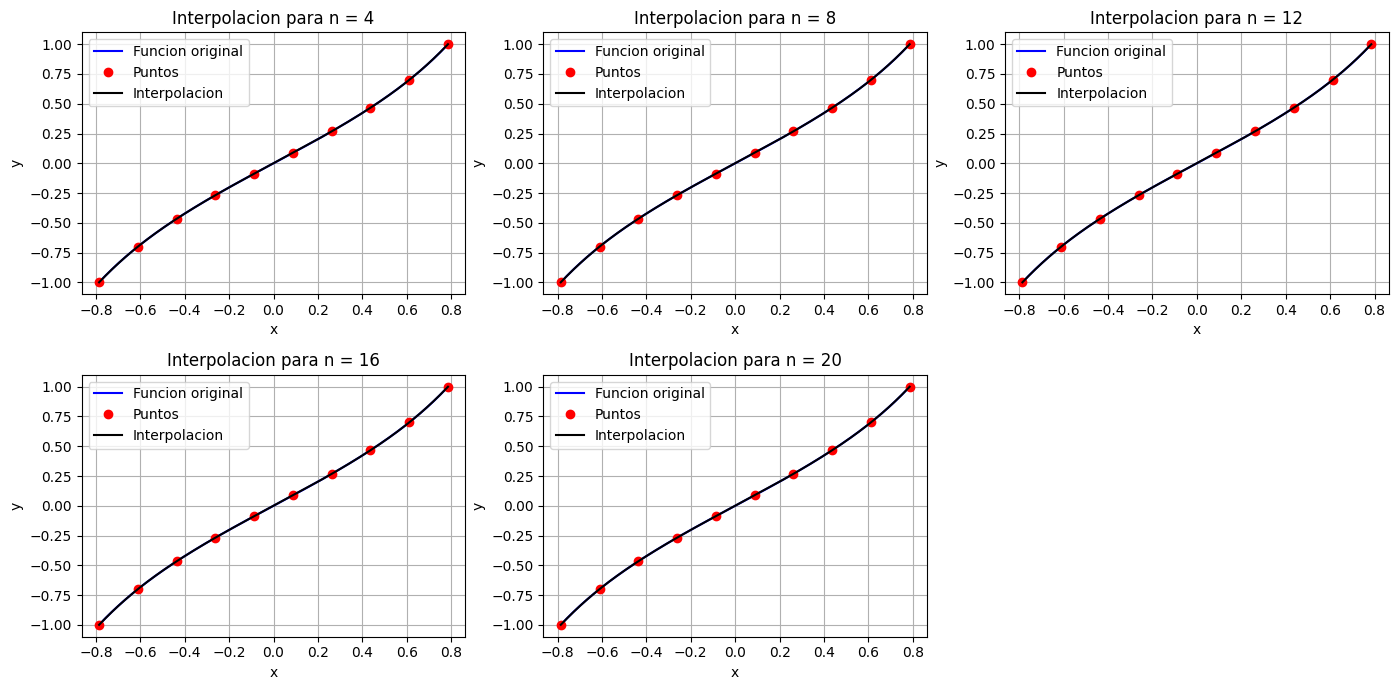

In [21]:
# Comportamiento de la interpolacion lineal al variar el numero de datos
# Definimos los n para los que queremos interpolar
N = [4, 8, 12, 16, 20]
plt.figure(figsize=(14, 7))  # Tamaño de la figura

for i in range(len(N)):
  n = N[i]+1

  pl = CubicSpline(xt_, ft(xt_)) # Funcion de interpolacion lineal
  xti = np.linspace(np.min(xt_), np.max(xt_), 1000)

  # Graficamos la interpolacion y la funcion
  plt.subplot(2, 3, i+1)  # Subgrafico i
  plt.title(f'Interpolacion para n = {N[i]}')
  plt.plot(xt, ft(xt), 'b-', label = 'Funcion original')
  plt.plot(xt_, ft(xt_), 'ro', label = 'Puntos')
  plt.plot(xti, pl(xti), 'k-', label = 'Interpolacion')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.grid()

plt.tight_layout()

##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


In [13]:
# Punto a
# Definimos nuestros datos
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fx =  np.array([0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623])

# Creamos un data frame para nuestros datos iniciales
dicc = {'x':x, 'fx':fx}
df = pd.DataFrame(dicc)
df

,x,fx
0,1.0,0.765198
1,1.3,0.620086
2,1.6,0.455402
3,1.9,0.281819
4,2.2,0.110362


In [14]:
# Definimos los nuevos datos
new_x_range = np.arange(1.1, 2.1, 0.1)
pl = lagrange(x, fx) # Funcion de interpolacion

new_fx = pl(new_x_range) # Valores intermedios

# Data frame de los valores intermedios
ndicc = {'x':new_x_range, 'fx':new_fx}
ndf = pd.DataFrame(ndicc)
ndf

,x,fx
0,1.1,0.719646
1,1.2,0.671148
2,1.3,0.620086
3,1.4,0.566846
4,1.5,0.511820
5,1.6,0.455402
6,1.7,0.397993
7,1.8,0.339995
8,1.9,0.281819
9,2.0,0.223875


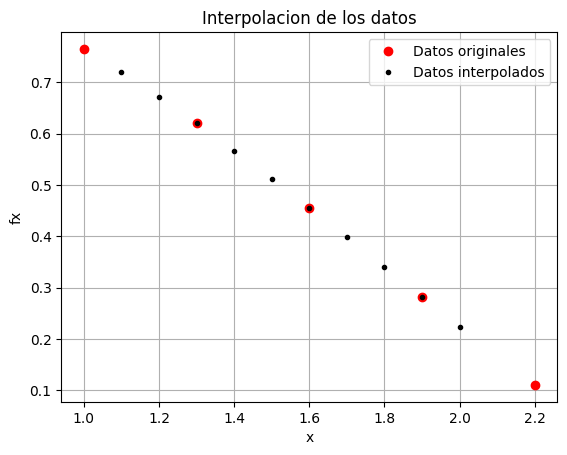

In [15]:
# Punto 2
# Generamos un grafico que nos muestre los datos dados y los datos interpolados
plt.title('Interpolacion de los datos')
plt.plot(df.x, df.fx, 'ro', label = 'Datos originales')
plt.plot(new_x_range, new_fx, '.k', label = 'Datos interpolados')
plt.xlabel('x')
plt.ylabel('fx')
plt.legend()
plt.grid()

     x        fx
0  1.1  0.719655
1  1.2  0.671154
2  1.3  0.620086
3  1.4  0.566843
4  1.5  0.511818
5  1.6  0.455402
6  1.7  0.397991
7  1.8  0.339992
8  1.9  0.281819
9  2.0  0.223881


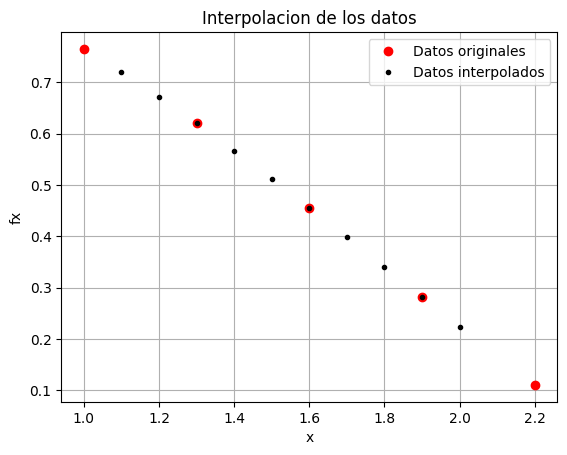

In [22]:
# Punto 3
# Haremos el calculo de los datos intermedios usando la interpolacion splines cubicos

ps = CubicSpline(x, fx) # Funcion de interpolacion

snew_fx = ps(new_x_range) # Valores intermedios

# Data frame de los valores intermedios
sdicc = {'x':new_x_range, 'fx':snew_fx}
sdf = pd.DataFrame(sdicc)
print(sdf)

# Graficamos los datos dados con los datos interpolados para ver su comparacion
plt.title('Interpolacion de los datos')
plt.plot(df.x, df.fx, 'ro', label = 'Datos originales')
plt.plot(new_x_range, snew_fx, '.k', label = 'Datos interpolados')
plt.xlabel('x')
plt.ylabel('fx')
plt.legend()
plt.grid()

Vemos que la diferencia es mínima entre los datos obtenidos con la interpolación de Lagrange y los obtenidos con la interpolación de splines cúbicos.

##4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

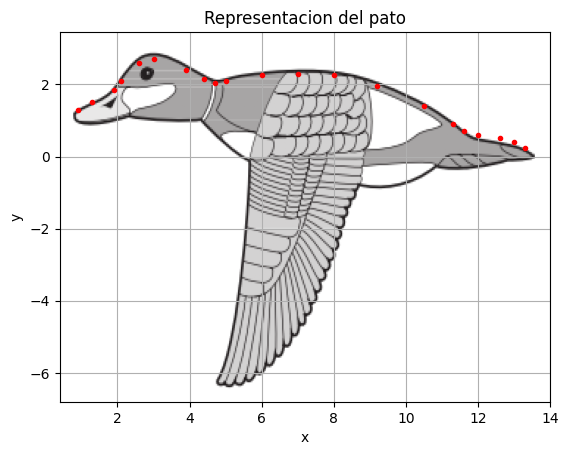

In [23]:
# Punto 1 y 2
# Definimos las variables necesarias para representar graficamente al pato
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

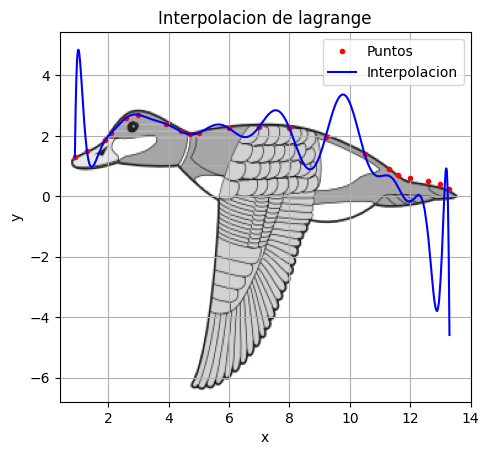

In [24]:
# Punto 3
pl = lagrange(xp, yp) # Funcion de interpolacion
xpl = np.linspace(np.min(xp), np.max(xp), 1000)

# Graficamos los puntos y la interpolacion de lagrange
plt.title('Interpolacion de lagrange')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label = 'Puntos')
plt.plot(xpl, pl(xpl), 'b-', label = 'Interpolacion')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

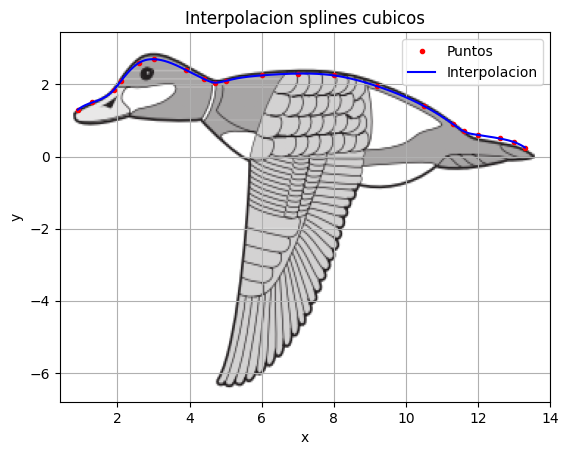

In [26]:
# Punto 4
# Realizamos de nuevo la interpolacion pero usando splines cubicos
pl = CubicSpline(xp, yp) # Funcion de interpolacion
xpl = np.linspace(np.min(xp), np.max(xp), 1000)

# Graficamos los puntos y la interpolacion de splines cubicos
plt.title('Interpolacion splines cubicos')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r', label = 'Puntos')
plt.plot(xpl, pl(xpl), 'b-', label = 'Interpolacion')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

Hay una gran diferencia entre la interpolación de Lagrange y la de splines cúbicos. La interpolación de Lagrange presenta muchas oscilaciones, mientras que los splines cúbicos hacen una interpolación muy precisa. Las oscilaciones en la interpolación de Lagrange se deben a la gran cantidad de puntos que estamos interpolando. Como vimos en el punto 1, el error de la interpolación aumenta a medida que aumenta el número de puntos.